In [1]:
import numpy as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

import WRFDomainLib

# main code

In [2]:
DEMFile = 'DemoData/ETOPO1.0_1degree.nc'
WPSFile = 'DemoData/namelist.wps.2010Nash'

In [3]:
DEMDs = xr.open_dataset(DEMFile)
dem = DEMDs['DEM'].values
dem_lat = DEMDs['lat'].values
dem_lon = DEMDs['lon'].values

dem_lons, dem_lats = np.meshgrid(dem_lon, dem_lat)

for i in np.arange(dem.shape[0]):
    for j in np.arange(dem.shape[1]):
        if dem[i,j]<0:
            dem[i,j]=0

In [4]:
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)

In [10]:
cmap = matplotlib.cm.terrain
vmin = 0
vmax = 3000

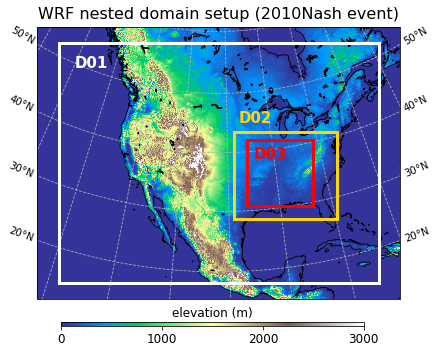

In [28]:
fig1 = plt.figure(figsize=(7,5))
ax1 = plt.subplot(1, 1, 1, projection=wpsproj)

ax1.pcolormesh(dem_lons, dem_lats, dem, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1, transform=ccrs.PlateCarree(), zorder=0)

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])

# d01 box
ax1.add_patch(matplotlib.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], 
                                    fill=None, lw=3, edgecolor='white', zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.05, corner_y1[0]+length_y[0]*0.9, 'D01',
         fontweight='bold', size=15, color='white', zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(matplotlib.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], 
                                    fill=None, lw=3, edgecolor='gold', zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.05, corner_y2[0]+length_y[1]*1.1, 'D02',
         fontweight='bold', size=15, color='gold', zorder=2)

# d03 box
corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
ax1.add_patch(matplotlib.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],
                                    fill=None, lw=3, edgecolor='red', zorder=2))
ax1.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',
         fontweight='bold', size=15, color='red', zorder=2)


# decorations
ax1.coastlines('50m', linewidth=0.8)
ax1.add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='lightblue', zorder=1)
ax1.add_feature(cartopy.feature.LAKES, edgecolor='k', facecolor='lightblue', zorder=1)
states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax1.add_feature(states, linewidth=0.5)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', alpha=1)
gl.top_labels = False
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels = True
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-180,-49,10))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,10))

ax1.set_title('WRF nested domain setup (2010Nash event)', size=16)

cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.01])
fig1.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
              cax=cbar_ax, ticks=np.arange(0, vmax+1, 1000), orientation='horizontal')
cbar_ax.tick_params(labelsize=12)
cbar_ax.text((vmin+vmax)/2, 5000, 'elevation (m)', ha='center', va='bottom', size=12)

#fig1.savefig('WRF_2010Nash_domain.png', dpi=600)

plt.show()
plt.close()
del(fig1)